# **Cristal Fotónico Unidimensional**

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 

## Método de Matriz de Transferencia para Dispersión

### Definición de las variables a usar
$Q_a$, $Q_b$. Además de los índices de refracción. En este caso $Q_i$ será el producto de $q$ por el ancho de la capa correspondiente

Capa $A$

In [1]:
a = 5
e_a = 8
u_a = 1

Capa $B$

In [2]:
b = 2
e_b = 1
u_b = 1

Ahora, definimos los índices de refracción, en este caso los representamos al cuadrado

In [3]:
n_a2 = e_a * u_a
n_b2 = e_b * u_b

Establecemos las condiciones para la capa $A$, en este caso, $Q$ está premultiplicado por $\frac{a}{2}$

In [4]:
def Q_a(v,theta):
    return (np.pi / 300) * v * (a/2) * np.sqrt(n_a2 - np.sin(theta)**2)

def M_a(v,theta):
    m = np.array([[np.cos(1*Q_a(v,theta)), u_a*a/(2 * Q_a(v,theta)) * np.sin(1 * Q_a(v,theta)) ],
                  [-2 * Q_a(v,theta)/(u_a * a) * np.sin(Q_a(v,theta)) , np.cos(1*Q_a(v,theta))]])
    return m

Ahora las condiciones para la capa $B$

In [5]:
def Q_b(v,theta):
    return (np.pi / 300) * v * np.sqrt(n_b2 - np.sin(theta)**2) * (b/2)

def M_b(v,theta):
    m = np.array([[np.cos(1*Q_b(v,theta)), u_b * b/ (2 * Q_b(v,theta)) * np.sin(1 * Q_b(v,theta)) ],
                  [-2 * Q_b(v,theta)/(u_b * b) * np.sin(Q_b(v,theta)) , np.cos(1*Q_b(v,theta))]])
    return m

Matriz de Transferencia Total

In [6]:
theta = 0
def M_t(v,theta):
    return np.dot(M_b(v,theta), M_a(v,theta))

def MAT(v,theta):
    return np.trace(M_t(v,theta))

def X(v,theta):
    if ((1/2)*MAT(v,theta)) < -1 :
        return 1
    if  ((1/2)*MAT(v,theta)) > 1 :
        return -1
    else:
        return (1/np.pi) * ((np.arccos((1/2)* MAT(v,theta)))).real

Text(0.5, 1.0, 'Matriz de Transferencia: Dispersión - Band Gaps')

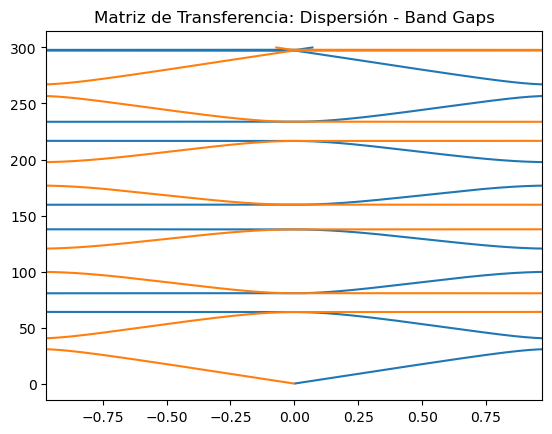

In [9]:
vs = np.arange(0.1,300,0.01)
values = [X(v,theta) for v in vs]
valuesNeg = [-X(v,theta) for v in vs]

plt.plot(values,vs)#,'o',markersize=0.85,color='black')
plt.plot(valuesNeg,vs)#,'o',markersize=0.85,color='black')
plt.xlim(-0.97,0.97)
plt.title('Matriz de Transferencia: Dispersión - Band Gaps')



## Método de Matriz de Transferencia para Transmisión

Definición de las variables que vamos a utilizar. Estas son:
$Q_a$, $Q_b$, $Q_c$ y $Q_d$. En esta caso, cada $Q_i$ será el producto de $q$ por el ancho de la capa correspondiente.


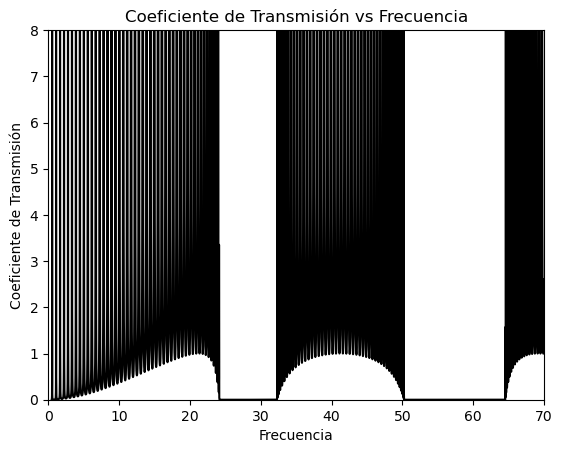

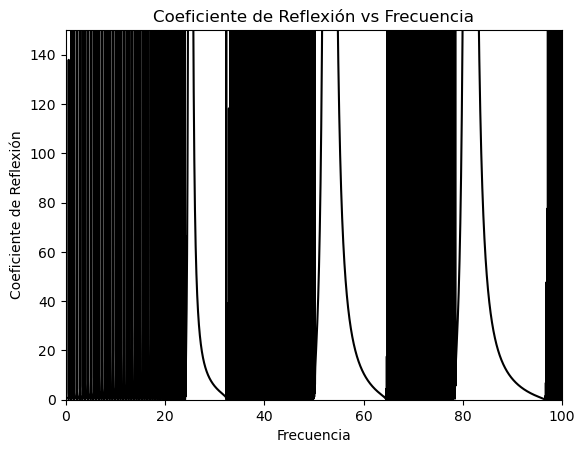

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de las variables a usar
# Capa a
def xi(theta):
    return np.cos(theta)

a = 5
epsilon_a = 13
mu_a = 1

# Capa b
b = 2
epsilon_b = 1
mu_b = 1

# Los siguientes representan los indices de refracción al cuadrado
n_a = epsilon_a * mu_a
n_b = epsilon_b * mu_b

# Condiciones para la capa A
def Q_a(nu, theta):
    return (np.pi / 300) * nu * (a / 2) * np.sqrt(n_a - np.sin(theta)**2)

def Ma(v,theta):
    m = np.array([[np.cos(1*Q_a(v,theta)), u_a*a/(2 * Q_a(v,theta)) * np.sin(1 * Q_a(v,theta)) ],
                  [-2 * Q_a(v,theta)/(u_a * a) * np.sin(Q_a(v,theta)) , np.cos(1*Q_a(v,theta))]])
    return m
# Condiciones para la capa B
def Q_b(nu, theta):
    return (np.pi / 300) * nu * (b / 2) * np.sqrt(n_b - np.sin(theta)**2)

def Mb(v,theta):
    m = np.array([[np.cos(1*Q_b(v,theta)), u_b * b/ (2 * Q_b(v,theta)) * np.sin(1 * Q_b(v,theta)) ],
                  [-2 * Q_b(v,theta)/(u_b * b) * np.sin(Q_b(v,theta)) , np.cos(1*Q_b(v,theta))]])
    return m
# Establecimiento de las condiciones para asignar las matrices
theta = 0 * np.pi / 12
lista3 = []
lista4 = []

for nu in np.arange(0.5, 100, 0.01):
    Maa = Ma(nu, theta)
    Mbb = Mb(nu, theta)
    MP = np.matmul(Mbb, Maa)  # Cambio aquí
    MT = np.eye(2)  # Inicializar MT como la matriz identidad
    for _ in range(50):  # Elevar MP a la potencia 50
        MT = np.matmul(MT, MP)
    
    # Cálculo del coeficiente de transmisión
    tras = np.abs((2 * xi(theta)) / (xi(theta) * (MT[0, 0] + MT[1, 1]) - MT[1, 0] - xi(theta)**2 * MT[0, 1]))**2
    refl = np.abs((xi(theta) * (-MT[1, 1] + MT[0, 0]) + MT[1, 0] - xi(theta)**2 * MT[0, 1]) /
                  (xi(theta) * (MT[1, 1] + MT[0, 0]) - MT[1, 0] - xi(theta)**2 * MT[0, 1]))**2
    
    lista3.append([nu, tras])
    lista4.append([nu, refl])

# Gráfico del coeficiente de transmisión
plt.figure()
plt.plot(*zip(*lista3), color='black', linestyle='-')
plt.xlabel('Frecuencia')
plt.ylabel('Coeficiente de Transmisión')
plt.title('Coeficiente de Transmisión vs Frecuencia')
plt.xlim([0,70])
plt.ylim([0,8])
plt.show()

# Gráfico del coeficiente de reflexión
plt.figure()
plt.plot(*zip(*lista4), color='black', linestyle='-')
plt.xlabel('Frecuencia')
plt.ylabel('Coeficiente de Reflexión')
plt.title('Coeficiente de Reflexión vs Frecuencia')
plt.xlim([0,100])
plt.ylim([0,150])
plt.show()
